## COGS 118A project Code 

In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
...


Ellipsis

## Data Import

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/COGS118A/Group045-Sp22/main/heart_2020_cleaned.csv")

In [3]:
#First Glance of the dataset
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Data Visuallization & Cleaning

In [4]:
#Check if there's any missing data in the dataset
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

The section below reshapes data into numerical values and get rid of the ranged values 

In [5]:
df = df.rename(columns={'AgeCategory': 'Age'})
df = df.replace({'Yes': 1, 'No': 0})
df['Sex'] = df['Sex'].replace({'Male': 1, 'Female': 0})
df['Diabetic']=df['Diabetic'].replace({'Yes (during pregnancy)': 1})
df['Diabetic']=df['Diabetic'].replace({'No, borderline diabetes': 0})
df["Age"] = df["Age"].replace({'55-59': 55, '80 or older': 80, '65-69': 65, 
                               '75-79': 75, '40-44': 40, '70-74': 70, 
                               '60-64': 60, '50-54': 50, '45-49': 45, 
                               '18-24': 18, '35-39': 35, '30-34': 30, 
                               '25-29': 25})
df = pd.concat([df,pd.get_dummies(df['Race'])], axis=1)
df = df.drop(columns=['Race'])
df['GenHealth'] = df['GenHealth'].replace({'Very good': 3, 'Poor': 0, 
                                           'Fair': 1, 'Good': 2, 'Excellent': 4})
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Age,...,SleepTime,Asthma,KidneyDisease,SkinCancer,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0,16.60,1,0,0,3.0,30.0,0,0,55,...,5.0,1,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,...,7.0,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,65,...,8.0,1,0,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,0,75,...,6.0,0,0,1,0,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,...,8.0,0,0,0,0,0,0,0,0,1


Then we check the correlation of all features against the HeartDisease 

In [6]:
df.corr()['HeartDisease']

HeartDisease                      1.000000
BMI                               0.051803
Smoking                           0.107764
AlcoholDrinking                  -0.032080
Stroke                            0.196835
PhysicalHealth                    0.170721
MentalHealth                      0.028591
DiffWalking                       0.201258
Sex                               0.070040
Age                               0.232325
Diabetic                          0.174782
PhysicalActivity                 -0.100030
GenHealth                        -0.243182
SleepTime                         0.008327
Asthma                            0.041444
KidneyDisease                     0.145197
SkinCancer                        0.093317
American Indian/Alaskan Native    0.008547
Asian                            -0.030262
Black                            -0.010156
Hispanic                         -0.036163
Other                            -0.003039
White                             0.040121
Name: Heart

From here we will reduce the dimensions by deleting features that has less than 0.1 correlation with HeartDisease 

In [7]:
df = df.drop(columns=['BMI', 'AlcoholDrinking', 'MentalHealth', 'Sex', 
                      'SleepTime', 'Asthma', 'SkinCancer', 
                      'American Indian/Alaskan Native', 'Asian', 'Black',
                      'Hispanic', 'Other', 'White'])

So here is our data after cleaning process

In [9]:
df

,HeartDisease,Smoking,Stroke,PhysicalHealth,DiffWalking,Age,Diabetic,PhysicalActivity,GenHealth,KidneyDisease
0,0,1,0,3.0,0,55,1,1,3,0
1,0,0,1,0.0,0,80,0,1,3,0
2,0,1,0,20.0,0,65,1,1,1,0
3,0,0,0,0.0,0,75,0,0,2,0
4,0,0,0,28.0,1,40,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...
319790,1,1,0,7.0,1,60,1,0,1,0
319791,0,1,0,0.0,0,35,0,1,3,0
319792,0,0,0,0.0,0,45,0,1,2,0
319793,0,0,0,0.0,0,25,0,0,2,0


# Model Code

## Decision Tree

In [13]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


In [14]:
X = df.drop(columns=['HeartDisease'])
y = df.HeartDisease
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
df.groupby('HeartDisease').count()
# Data is imbalanced

,Smoking,Stroke,PhysicalHealth,DiffWalking,Age,Diabetic,PhysicalActivity,GenHealth,KidneyDisease
HeartDisease,,,,,,,,,
0,292422,292422,292422,292422,292422,292422,292422,292422,292422
1,27373,27373,27373,27373,27373,27373,27373,27373,27373


Then we implement grid search to determine the best parameters 

In [16]:
trees = tree.DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth': range(1, 8)}
grid = GridSearchCV(trees, parameters, verbose = 3)
grid.fit(X, y)
# View the Grid Search CV Results
print(grid.cv_results_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END .......................max_depth=1;, score=0.510 total time=   0.0s
[CV 2/5] END .......................max_depth=1;, score=0.516 total time=   0.0s
[CV 3/5] END .......................max_depth=1;, score=0.516 total time=   0.0s
[CV 4/5] END .......................max_depth=1;, score=0.523 total time=   0.0s
[CV 5/5] END .......................max_depth=1;, score=0.532 total time=   0.0s
[CV 1/5] END .......................max_depth=2;, score=0.717 total time=   0.0s
[CV 2/5] END .......................max_depth=2;, score=0.728 total time=   0.0s
[CV 3/5] END .......................max_depth=2;, score=0.728 total time=   0.0s
[CV 4/5] END .......................max_depth=2;, score=0.724 total time=   0.0s
[CV 5/5] END .......................max_depth=2;, score=0.717 total time=   0.0s
[CV 1/5] END .......................max_depth=3;, score=0.630 total time=   0.1s
[CV 2/5] END .......................max_depth=3;,

Text(0.5, 1.0, 'Mean Accuracy across different Max Depth')

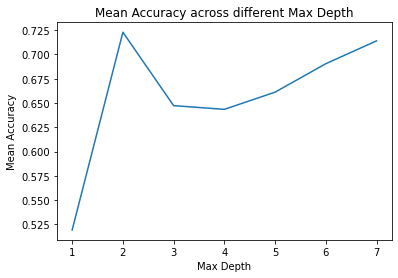

In [17]:
plt.plot(range(1,8),grid.cv_results_['mean_test_score'])
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy across different Max Depth')

From here the best tree depth should be 2

In [18]:
clf = tree.DecisionTreeClassifier(max_depth=2, class_weight='balanced')
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2)

[Text(167.4, 181.2, 'X[4] <= 52.5\ngini = 0.5\nsamples = 223856\nvalue = [111928.0, 111928.0]'),
 Text(83.7, 108.72, 'X[7] <= 1.5\ngini = 0.322\nsamples = 101829\nvalue = [54375.867, 13771.783]'),
 Text(41.85, 36.23999999999998, 'gini = 0.495\nsamples = 9811\nvalue = [4815.506, 5871.19]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.237\nsamples = 92018\nvalue = [49560.36, 7900.593]'),
 Text(251.10000000000002, 108.72, 'X[7] <= 2.5\ngini = 0.466\nsamples = 122027\nvalue = [57552.133, 98156.217]'),
 Text(209.25, 36.23999999999998, 'gini = 0.386\nsamples = 60214\nvalue = [26047.462, 73668.484]'),
 Text(292.95, 36.23999999999998, 'gini = 0.492\nsamples = 61813\nvalue = [31504.671, 24487.733]')]

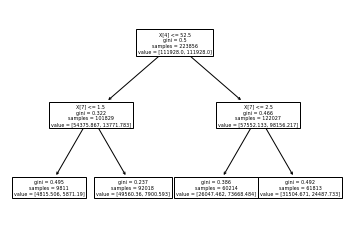

In [19]:
tree.plot_tree(clf)

In [20]:
y_pred =  clf.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  0.7230987777857194
Accuracy Score on test data:  0.7225007556885104


In [22]:
from sklearn.metrics import f1_score, recall_score
print('f1 score on train data: ', f1_score(y_true = y_train, y_pred = clf.predict(X_train)))
print('f1 score on test data: ', f1_score(y_true = y_test, y_pred = y_pred))
print('recall on train data: ', recall_score(y_true = y_train, y_pred = clf.predict(X_train)))
print('recall on test data: ', recall_score(y_true = y_test, y_pred = y_pred))

f1 score on train data:  0.3043722224716075
f1 score on test data:  0.30580688899898306
recall on train data:  0.7106325001310067
recall on test data:  0.7073582629674307


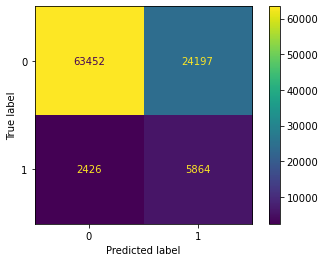

In [23]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  

## KNN 

In [24]:
k_range = range(1, 16)
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

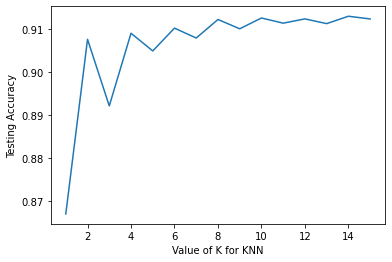

In [25]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## Training & Testing models